# Observing Steph Curry's Rise to Fame

I wanted to analyze a file of Steph Curry and see how his stats may have improved over the years. 

In [1]:
import pandas as pd
file = pd.read_csv(r'C:\Users\Chris\Downloads\Stephen Curry Stats.csv')
 

In [2]:
file.head()

,Dates,Opponent,Score,Minutes,Successful Shots,Total Shots,3 Points Succesful,Total 3 Points,Successful FT,Total FT,...,AST,BLK,STL,PF,TO,PTS,Type,Result,Score GS,Score Opponent
0,10/28/2009,HOU,L 107-108,36,7,12,0,1,0,0,...,7,0,4,2,2,14,REGULAR SEASON STATS,L,107,108
1,10/30/2009,PHX,L 101-123,39,5,9,2,3,0,0,...,4,0,1,5,3,12,REGULAR SEASON STATS,L,101,123
2,11/4/2009,MEM,W 113-105,28,3,6,1,2,0,0,...,9,0,2,4,1,7,REGULAR SEASON STATS,W,113,105
3,11/6/2009,LAC,L 90-118,22,1,5,0,1,3,4,...,3,0,0,6,0,5,REGULAR SEASON STATS,L,90,118
4,11/8/2009,SAC,L 107-120,31,4,8,1,2,0,2,...,6,0,0,4,5,9,REGULAR SEASON STATS,L,107,120


In [3]:
clean = file[['Dates', 'Score','Minutes', 'PTS','REB','AST','Result']]
clean

,Dates,Score,Minutes,PTS,REB,AST,Result
0,10/28/2009,L 107-108,36,14,2,7,L
1,10/30/2009,L 101-123,39,12,2,4,L
2,11/4/2009,W 113-105,28,7,5,9,W
3,11/6/2009,L 90-118,22,5,1,3,L
4,11/8/2009,L 107-120,31,9,4,6,L
...,...,...,...,...,...,...,...
873,10/22/2018,W 123-103,30,29,4,8,W
874,10/24/2018,W 144-122,32,51,4,3,W
875,10/26/2018,W 128-100,33,29,4,2,W
876,10/28/2018,W 120-114,36,35,7,3,W


In [4]:
import datetime as dt
string = "%M/%d/%Y"

for index in clean.index:
    date = clean.loc[index,'Dates']
    year = dt.datetime.strptime(date, string).strftime("%Y")
    clean.loc[index,'Dates'] = year

C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [5]:
first_season = clean[clean['Dates'] == '2009']

In [6]:
first_season.head()

,Dates,Score,Minutes,PTS,REB,AST,Result
0,2009,L 107-108,36,14,2,7,L
1,2009,L 101-123,39,12,2,4,L
2,2009,W 113-105,28,7,5,9,W
3,2009,L 90-118,22,5,1,3,L
4,2009,L 107-120,31,9,4,6,L


# Visualization

Now that we have some clean data for the 2009 season, let's look at his stats.

In [7]:
import seaborn as sns

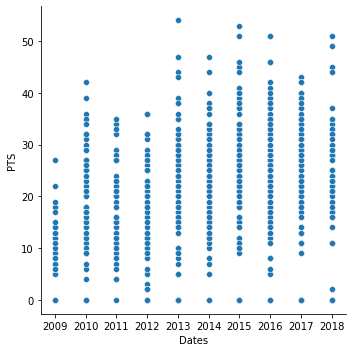

In [8]:
sns.relplot(x="Dates", y="PTS",
            data=clean) #

I thought this was kind of interesting, but not super reliable, so I made a box chart as well, which I think shows the consistency a bit better, and we can see that 2017 was his best season throughout 2009 - 2018

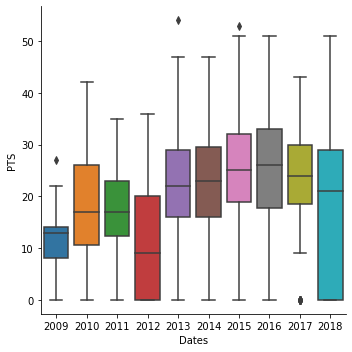

In [9]:
sns.catplot(x = 'Dates', y = 'PTS', data = clean, kind = 'box')

But this also includes games where he didn't play, let's get rid of those and see what happens

In [10]:
played_games = clean[clean['Minutes'] != 0]

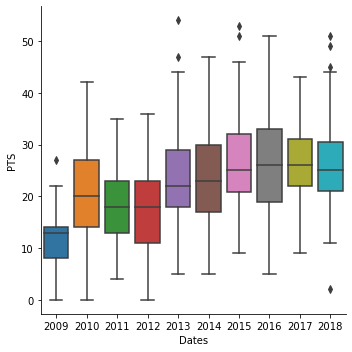

In [11]:
sns.catplot(x = 'Dates', y = 'PTS', data = played_games, kind = 'box')

This dramatically helps the 2012 season because Steph missed 32 games because of a sprained ligament in his foot.

# Other Data Set

In [12]:
file_2 = pd.read_csv(r'C:\Users\Chris\Downloads\archive\Stephen Curry Stats.csv')

In [13]:
file_2.head()

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,12,12,100.0,9,8,1,2,0,2,42
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,6,6,100.0,5,6,0,2,4,2,17
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,4,6,66.7,7,7,0,1,2,5,25
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,4,4,100.0,9,4,0,3,5,3,29
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,0,0,0.0,8,14,0,7,4,4,27


In [16]:
clean_again = file_2[['Season_year', 'PTS','REB', 'AST','3P%','Season_div','MIN','Result']]

In [18]:
clean_again.head()

,Season_year,PTS,REB,AST,3P%,Season_div,MIN,Result
0,2009-2010,42,9,8,66.7,Regular,48.0,W
1,2009-2010,17,5,6,25.0,Regular,41.0,L
2,2009-2010,25,7,7,50.0,Regular,35.0,W
3,2009-2010,29,9,4,50.0,Regular,41.0,L
4,2009-2010,27,8,14,60.0,Regular,44.0,W


In [19]:
play = clean_again[clean_again['MIN'] != 0]

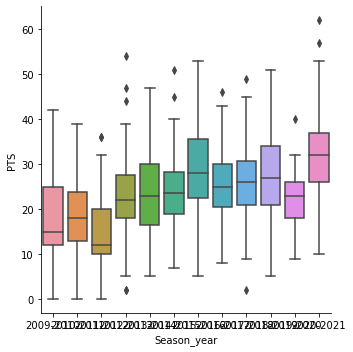

In [20]:
sns.catplot(x = 'Season_year', y = 'PTS', data = play, kind = 'box')